# Simple Decision Tree Example

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
import graphviz

In [2]:
# Conjunto de Dados de Exemplo
data = {
    'Sede Excessiva': ['Sim', 'Sim', 'Sim', 'Não'],
    'Perda de Peso': ['Sim', 'Não', 'Não', 'Não'],
    'Urina Frequente': ['Sim', 'Sim', 'Não', 'Não'],
    'Diagnóstico': ['Diabetes', 'Diabetes', 'Não Diabetes', 'Não Diabetes']
}


In [3]:
# Criar DataFrame
df = pd.DataFrame(data)


In [4]:
# Codificar variáveis categóricas
df_encoded = pd.get_dummies(df, columns=['Sede Excessiva', 'Perda de Peso', 'Urina Frequente'])

In [5]:
# Separar features e target
X = df_encoded.drop('Diagnóstico', axis=1)
y = df_encoded['Diagnóstico']

In [6]:
# Codificar target
y_encoded = y.map({'Diabetes': 1, 'Não Diabetes': 0})

In [7]:
# Dividir os dados em treinamento e teste
# X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
X_train = X
y_train = y_encoded

In [8]:
# Criar e treinar o modelo de árvore de decisão
clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [9]:
# Mostrar as regras da árvore
print("Regras da Árvore de Decisão:")
tree_rules = export_text(clf, feature_names=list(X.columns))
print(tree_rules)

Regras da Árvore de Decisão:
|--- Urina Frequente_Não <= 0.50
|   |--- class: 1
|--- Urina Frequente_Não >  0.50
|   |--- class: 0



In [10]:
# Visualizar a árvore de decisão
dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=X.columns,  
                           class_names=['Não Diabetes', 'Diabetes'],
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render('arvore_decisao_diabetes', format='png', view=True)

'arvore_decisao_diabetes.png'

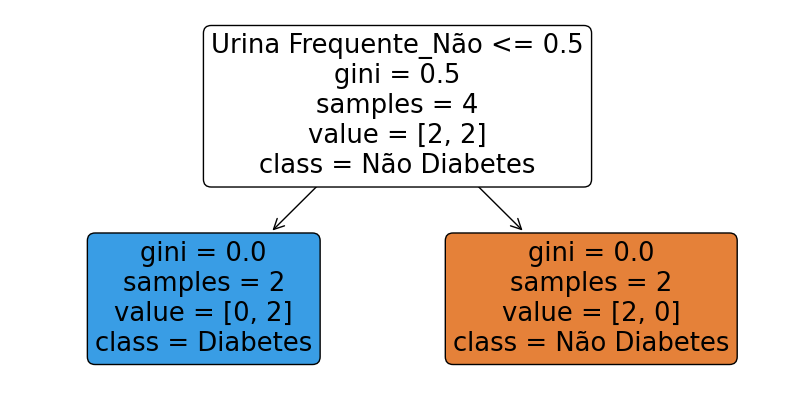

In [11]:
# Plotar a árvore usando matplotlib
plt.figure(figsize=(10,5))
a = tree.plot_tree(clf, 
                   feature_names=X.columns,  
                   class_names=['Não Diabetes', 'Diabetes'], 
                   filled=True, 
                   rounded=True)
plt.show()